# Hasbi Thaufik Oktodila

# *Mobile Game Seperti Apa yang Didownload Banyak Orang?*

# Latar Belakang

Mobile game merupakan salah satu hiburan banyak orang yang sangat mudah untuk diakses. Popularitas mobile game bahkan mengalahkan popularitas game di desktop/laptop. Hal ini disebabkan jangkauan pasar mobile game yang sangat luas. Perusahaan developer game PC ingin merambah pasar game mobile karena pasarnya yang luas. 

Produksi game memerlukan investasi waktu dan biaya yang banyak. Tentunya kita tidak mau waktu dan sumber daya yang dikerahkan terbuang sia-sia. Sudah seharusnya untuk merencanakan matang-matang game seperti apa yang laku di pasara.

Lalu, pertanyaan yang muncul adalah, game seperti apa yang paling banyak menghasilkan jumlah download?

Dengan mengetahui game seperti apa yang paling banyak didwonload para pengguna handphone, para developer bisa melakukan desain game dengan lebih terarah agar game tersebut diterima pasar yang lebih luas.

[Link dashboard](https://public.tableau.com/views/tableau_milestone/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

# Data Loading

Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import datetime
import warnings
from hamcrest import contains
warnings.filterwarnings(action='ignore')

Loading the data

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.shape

(10841, 13)

In [4]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
# mengecek data type dari masing-masing kolom
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Dari tiga tabel di atas, bisa dilihat banyak tipe data numerik yang masih bersifat **object** sehingga menyulitkan untuk dihitung.
- Installs memiliki '+'
- Size memiliki 'M'

Untuk menghitung value-value tersebut, perlu dijadikan integer atau float. Dari sini proses data cleaning dimulai

# Data Cleaning

Hal yang dilakukan disini:
- menghilangkan nilai null
- mengubah datatype sesuai yang diperlukan
    - kolom Size dari *object* menjadi *integer*
    - kolom Installs dari *object* menjadi *integer*
    - kolom Price dari *object* menjadi *integer*
    - kolom Last Updated *object* menjadi *integer*
- mengatasi outlier

## Menghilangkan nilai null

In [7]:
df = df.dropna(axis=0)

In [8]:
df.shape

(9360, 13)

## Mengubah data type sesuai yang diperlukan

Menghilangkan bagian string yang tidak diperlukan agar bisa dikonversi menjadi integer/float

In [9]:
# menghilangkan tanda tambah (+) di kolom 'Installs'
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))

# menghilangkan ',' di kolom 'Installs'
df["Installs"] = df['Installs'].str.replace(',', '')

# menghilangkan huruf 'M' di kolom 'Size' (M disini representasi dari MB)
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))

# menghilangkan simbol '$' di kolom 'Price'
df['Price'] = df['Price'].map(lambda x: x.lstrip('$')) 

# mengubah nama kolom 'Size'
df = df.rename(columns={'Size' : 'Size_M'})          

# mengubah nama kolom 'Installs'
df = df.rename(columns={'Installs' : 'Installs_+'})   
                      
df.head()

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Mengecek apakah sudah terkonversi
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size_M             object
Installs_+         object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Dari info di atas, tipe data yang akan dihitung akan diubah menjadi float/integer, dan tipe data Last Updated akan dikonversi menjadi datetime

In [11]:
# mengkonversi data type 'Last Updated' menjadi datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# mengkonversi data type 'Install_+' menjadi integer
df['Installs_+'] = df['Installs_+'].astype(int)

# mengkonversi data type 'Price' menjadi 'Float'
df['Price'] = df['Price'].astype(float)

# mengkonversi data type 'Review' menjadi integer
df['Reviews'] = df['Reviews'].astype(float)

Untuk kolom Size bisa dibilang unik karena: 
- karena ada value 'Varies with device' (tergantung device), value 'Varies with device' akan dilihat persebaran datanya, apakah diganti dengan mean atau modus.
- ada kolom dengan simbol 'k' untuk melambangkan size aplikasi dengan kilobyte. Value dengan kilobyte akan dipukul rata menjadi 1 mb.

In [12]:
# mencari modus data Price
df2 = df.drop(df[df['Size_M'] == 'Varies with device'].index)

Saat dicek skewness data Price, masih ada data string dengan keterangan '201k'

In [13]:
# melakukan pengecekan data yang masih bersifat string
df2[df2['Size_M'] == '201k']

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403.0,201k,100000,Free,0.0,Everyone,Auto & Vehicles,2014-08-26,1.0.1,2.2 and up
6273,BI Office,BUSINESS,4.0,76.0,201k,10000,Free,0.0,Everyone,Business,2017-06-07,2.7.1,3.0 and up
8650,To-Do List Widget,PRODUCTIVITY,3.9,7801.0,201k,1000000,Free,0.0,Everyone,Productivity,2013-09-28,2.0,1.5 and up


Untuk aplikasi yang berada di bawah 1 MB akan dibulatkan menjadi 1MB. Hal ini untuk memudahkan perhitungan dan pengelompokan.

In [14]:
df.loc[df['Size_M'].str.contains('k'), 'Size_M'] =1

In [15]:
df.loc[58]

App                 Restart Navigator
Category            AUTO_AND_VEHICLES
Rating                            4.0
Reviews                        1403.0
Size_M                              1
Installs_+                     100000
Type                             Free
Price                             0.0
Content Rating               Everyone
Genres                Auto & Vehicles
Last Updated      2014-08-26 00:00:00
Current Ver                     1.0.1
Android Ver                2.2 and up
Name: 58, dtype: object

Mengecek skewness untuk memutuskan perlakuan data 'Varies with device'

In [16]:
# mengecek skewness untuk memutuskan mengisi mean/modus
df2.skew()

Rating        -1.750651
Reviews       13.631838
Installs_+    13.832356
Price         22.169177
dtype: float64

In [17]:
# mencari mode kolom Size_M
df2['Size_M'].mode()

0    14
Name: Size_M, dtype: object

Persebaran data bersifat skew ke kanan, jadi data Price 'Varies with device' akan diisi dengan modus dari data Price (14)

In [18]:
df.loc[df['Size_M'] == 'Varies with device','Size_M'] = 14

Mengkonversi tipe data 'Size_M' menjadi float

In [19]:
df['Size_M'] = df['Size_M'].astype(float)

Mengecek tipe data keseluruhan

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   float64       
 4   Size_M          9360 non-null   float64       
 5   Installs_+      9360 non-null   int64         
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   float64       
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [21]:
df = df.drop_duplicates()
df

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,14.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


## Dataframe Aplikasi Game

In [22]:
dfgame = df[df['Category'] == 'GAME']
dfgame

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258.0,23.0,10000000,Free,0.0,Everyone,Card,2018-08-01,2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897.0,46.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287.0,38.0,50000,Free,0.0,Everyone,Word,2013-12-18,1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661.0,16.0,1000000,Free,0.0,Everyone,Trivia,2018-05-24,1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510.0,78.0,500000,Free,0.0,Teen,Card,2018-08-01,2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496.0,81.0,1000000,Free,0.0,Teen,Action,2018-08-07,1.5.447,4.0 and up


In [23]:
dfgame = dfgame.drop_duplicates()

In [24]:
dfgame.to_csv('for_tableau.csv')

# Data Exploration

Handling Outliers

In [25]:
df['Installs_+'].skew()

9.37254110498696

In [26]:
df['Installs_+'].mode()

0    1000000
Name: Installs_+, dtype: int64

In [27]:
dfgame.shape

(1074, 13)

Jika dilihat dari list ini, Roblox dan Subway Surfers memang game yang sangat populer. Outlier ini akan dibiarkan saja mengingat besarnya kemungkinan title game ini memiliki angka instalasi yang tinggi.

In [28]:
dfgame.head(1)

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


# Data Analysis

## Karakteristik Game dengan Jumlah Instalasi Terbanyak

### 1. Genre

In [29]:
df_game1 = dfgame.groupby(['Genres'])['Installs_+'].sum().sort_values(ascending=False).to_frame().reset_index()
df_game1 

,Genres,Installs_+
0,Arcade,9717077727
1,Action,8336037470
2,Casual,5949000000
3,Racing,2000246020
4,Puzzle,1073200000
5,Sports,1016000000
6,Strategy,957300000
7,Adventure;Action & Adventure,500000000
8,Adventure,406695300
9,Music,270120000


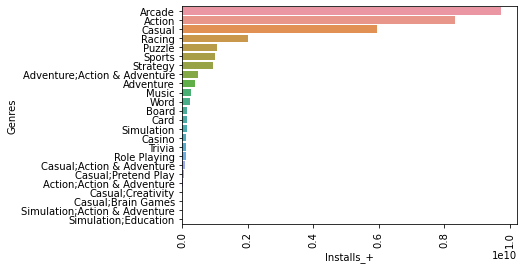

<Figure size 3600x2880 with 0 Axes>

In [30]:
ax = sns.barplot(x = 'Installs_+', y='Genres', data=df_game1.sort_values(by='Installs_+', ascending=False))
plt.xticks(rotation=90)
plt.figure(figsize=(50,40))
plt.tight_layout
plt.show()

Dapat dilihat bahwa genre game dengan jumlah instalasi terbanyak yaitu:
1. Arcade
2. Action
3. Casual
4. Racing
5. Puzzle

Developer sebaiknya mempertimbangkan kelima genre game ini untuk rilis selanjutnya.

Pertanyaan selanjutnya, bagaimana dengan ukuran game Arcade itu sendiri?

In [31]:
df_game1_meansize = dfgame.groupby(['Genres'])['Size_M'].mean().sort_values(ascending=False).to_frame().reset_index()
df_game1_meansize[df_game1_meansize['Genres'] == 'Arcade'] 

,Genres,Size_M
10,Arcade,40.36


In [32]:
df_game1_modesize = dfgame.groupby(['Genres'])['Size_M'].apply(pd.Series.mode).sort_values(ascending=False).to_frame().reset_index()
df_game1_modesize[df_game1_modesize['Genres'] == 'Arcade'] 

,Genres,level_1,Size_M
28,Arcade,0,14.0


Dari dua tabel di atas didapatkan bahwa rata-rata ukuran game Arcade yang ideal yaitu 40.36 MB, namun, ukuran yang paling banyak ditemui adalah 14 MB. Jika developer mempertimbangkan sekompleks apa game yang akan dibuat selanjutnya, sebaiknya tidak jauh-jauh dari 2 ukuran file di atas.

In [33]:
df_game1_modever = dfgame.groupby(['Genres'])['Android Ver'].apply(pd.Series.mode).sort_values(ascending=False).to_frame().reset_index()
df_game1_modever[df_game1_modever['Genres'] == 'Arcade'] 

,Genres,level_1,Android Ver
14,Arcade,0,4.1 and up


Untuk compatibility gamenya, developer sebaiknya mempertimbangkan untuk mencocokkan dengan Android versi 4.1 ke atas.

### 2. Content Rating

In [34]:
df_game2 = dfgame.groupby(['Content Rating'])['Installs_+'].sum().sort_values(ascending=False).to_frame().reset_index()
df_game2 

,Content Rating,Installs_+
0,Everyone,18867371147
1,Everyone 10+,8229860000
2,Teen,3582009360
3,Mature 17+,864622210


<AxesSubplot:ylabel='Content Rating'>

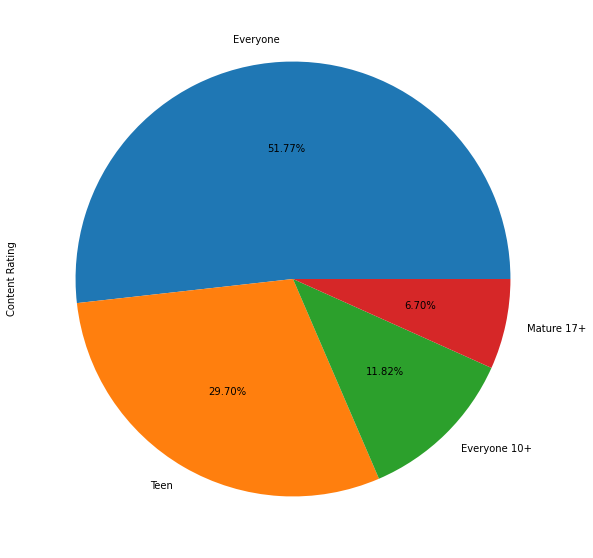

In [35]:
dfgame['Content Rating'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')

Kategori 'Everyone' adalah kategori yang patut untuk dipertimbangkan bagi para developer dalam mendesign target pasar game yang akan didesain.

### 3. Average Size

In [36]:
df_game3 = dfgame.groupby(['Size_M'])['Installs_+'].mean().sort_values(ascending=False).to_frame().reset_index()
df_game3['Size_M'].mean() 

36.4041379310345

Average size game dengan jumlah instalasi terbanyak: 36 Mb

### 4. Model Bisnis

Ada dua model bisnis game yang ada di video game:
- Free to play,
    - Untuk game free to play biasanya menghasilkan revenue dari pemasangan iklan, atau menjual in-game item.
- Pay to play,
    - Game jenis ini menghasilkan revenue dari pembelian game di Google Play Store.

Untuk itu, perlu diamati lebih lanjut bisnis model yang akan ditempuh untuk game selanjutnya.

In [37]:
df_game3 = dfgame.groupby(['Type'])['Installs_+'].sum().sort_values(ascending=False).to_frame().reset_index()
df_game3 

,Type,Installs_+
0,Free,31522763455
1,Paid,21099262


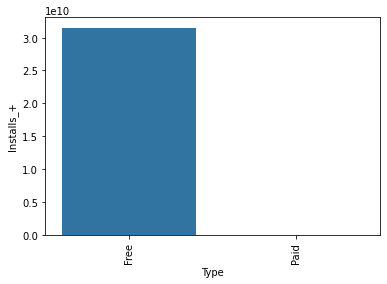

<Figure size 3600x2880 with 0 Axes>

In [38]:
ax = sns.barplot(x = 'Type', y='Installs_+', data=df_game3.sort_values(by='Installs_+', ascending=False))
plt.xticks(rotation=90)
plt.figure(figsize=(50,40))
plt.tight_layout
plt.show()

Perbedaan yang sangat signifikan. Untuk tipe game free sudah jelas akan menghasilkan angka total instalasi yang tinggi. Dari model bisnisnya pun sudah jelas, melalui pemasangan iklan atau menjual in-game item. Meskipun begitu, kita masih tetap harus model bisnis 'pay to play'. 

In [39]:
dfgame_paid = dfgame[dfgame['Type']=='Paid']
dfgame_paid

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1831,The Game of Life,GAME,4.4,18621.0,63.0,100000,Paid,2.99,Everyone,Board,2018-07-04,2.1.2,4.4 and up
1832,Clue,GAME,4.6,19922.0,35.0,100000,Paid,1.99,Everyone 10+,Board,2018-07-30,2.2.5,5.0 and up
1833,The Room: Old Sins,GAME,4.9,21119.0,48.0,100000,Paid,4.99,Everyone,Puzzle,2018-04-18,1.0.1,4.4 and up
1834,The Escapists,GAME,4.4,7412.0,84.0,100000,Paid,4.99,Teen,Strategy,2018-04-26,1.1.0,2.3 and up
1835,Farming Simulator 18,GAME,4.5,18125.0,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10270,Galaxian(FC),GAME,4.5,2.0,7.8,100,Paid,1.99,Everyone,Arcade,2015-11-13,1.0,2.3 and up
10679,Solitaire+,GAME,4.6,11235.0,14.0,100000,Paid,2.99,Everyone,Card,2018-07-30,Varies with device,Varies with device
10682,Fruit Ninja Classic,GAME,4.3,85468.0,36.0,1000000,Paid,0.99,Everyone,Arcade,2018-06-08,2.4.1.485300,4.0.3 and up
10697,Mu.F.O.,GAME,5.0,2.0,16.0,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


Dalam memilih model bisnis ini, perlu adanya pertimbangan mengenai harga game yang akan dipasarkan, karena hal ini sangat berpengaruh apakah game kita akan dibeli atau tidak. Untuk melakukannya, pertama-tama akan dilakukan eliminasi outlier dari harga-harga game berbayar.

In [40]:
print(dfgame_paid.shape)
print(dfgame_paid['Price'].skew())

(77, 13)
2.5046952644969513


In [41]:
Q1 = dfgame_paid['Price'].quantile(0.25)
Q3 = dfgame_paid['Price'].quantile(0.75)
IQR = Q3 - Q1

limit_bawah = Q1 - 1.5 * IQR
limit_atas = Q3 + 1.5 * IQR

print('limit_atas   : ',Q1)
print('limit_bawah  : ',Q3)

limit_atas   :  0.99
limit_bawah  :  4.99


In [42]:
dfgame_paid_cl = dfgame_paid[(dfgame_paid['Price'] > limit_bawah) & (dfgame_paid['Price'] < limit_atas)]
dfgame_paid_cl

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1831,The Game of Life,GAME,4.4,18621.0,63.0,100000,Paid,2.99,Everyone,Board,2018-07-04,2.1.2,4.4 and up
1832,Clue,GAME,4.6,19922.0,35.0,100000,Paid,1.99,Everyone 10+,Board,2018-07-30,2.2.5,5.0 and up
1833,The Room: Old Sins,GAME,4.9,21119.0,48.0,100000,Paid,4.99,Everyone,Puzzle,2018-04-18,1.0.1,4.4 and up
1834,The Escapists,GAME,4.4,7412.0,84.0,100000,Paid,4.99,Teen,Strategy,2018-04-26,1.1.0,2.3 and up
1835,Farming Simulator 18,GAME,4.5,18125.0,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,An Elite Warrior Ex,GAME,4.7,15.0,93.0,100,Paid,0.99,Everyone,Adventure,2016-11-21,1.59,4.0.3 and up
10270,Galaxian(FC),GAME,4.5,2.0,7.8,100,Paid,1.99,Everyone,Arcade,2015-11-13,1.0,2.3 and up
10679,Solitaire+,GAME,4.6,11235.0,14.0,100000,Paid,2.99,Everyone,Card,2018-07-30,Varies with device,Varies with device
10682,Fruit Ninja Classic,GAME,4.3,85468.0,36.0,1000000,Paid,0.99,Everyone,Arcade,2018-06-08,2.4.1.485300,4.0.3 and up


<AxesSubplot:>

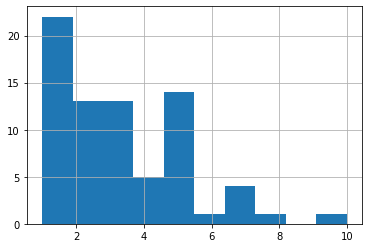

In [44]:
dfgame_paid_cl.Price.hist()

Text(0.5, 1.0, 'Persebaran Harga Game Berbayar')

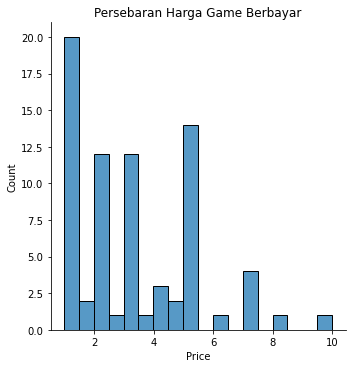

In [ ]:
sns.displot(dfgame_paid_cl, x='Price', binwidth=0.5)
plt.title('Persebaran Harga Game Berbayar')

In [ ]:
meanprice = dfgame_paid_cl['Price'].mean()
mediprice = dfgame_paid_cl['Price'].median()
modeprice = dfgame_paid_cl['Price'].mode()
stdprice = dfgame_paid_cl['Price'].std()

In [ ]:
print("Paid Game's Price Central Tendencies:")
print("=====================================")
print("Price's mean  : ", meanprice)
print("Price's median: ", mediprice)
print("Price's mode  : ", modeprice)
print("Price's STD   : ", stdprice)

Paid Game's Price Central Tendencies:
Price's mean  :  3.1267567567567602
Price's median:  2.99
Price's mode  :  0    0.99
Name: Price, dtype: float64
Price's STD   :  2.046615721777039


In [ ]:
dfgame_paid_genre = dfgame_paid_cl.groupby(['Genres'])['Installs_+'].sum().sort_values(ascending=False).to_frame().reset_index()
dfgame_paid_genre

,Genres,Installs_+
0,Action,17042250
1,Arcade,1427212
2,Adventure,1278200
3,Board,314000
4,Card,207500
5,Puzzle,200000
6,Racing,110000
7,Music,100000
8,Role Playing,100000
9,Simulation,100000


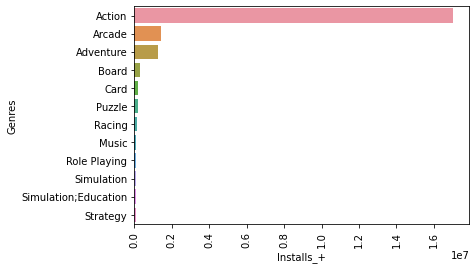

<Figure size 3600x2880 with 0 Axes>

In [ ]:
ax = sns.barplot(x = 'Installs_+', y='Genres', data=dfgame_paid_genre.sort_values(by='Installs_+', ascending=False))
plt.xticks(rotation=90)
plt.figure(figsize=(50,40))
plt.tight_layout
plt.show()

<AxesSubplot:ylabel='Content Rating'>

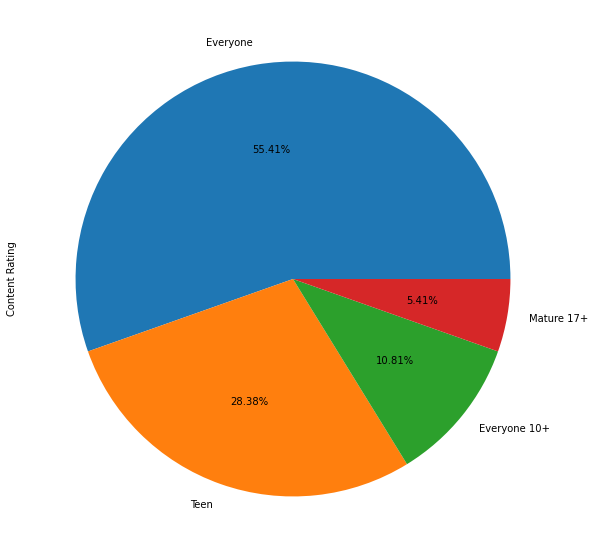

In [ ]:
dfgame_paid_cl['Content Rating'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')

#### Rekomendasi Harga Game Bergenre Action

In [ ]:
dfgame_action = dfgame_paid_cl[dfgame_paid_cl['Genres']=='Action']
dfgame_action.head(3)

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1837,Call of Duty:Black Ops Zombies,GAME,4.2,13004.0,46.0,100000,Paid,6.99,Teen,Action,2016-12-20,1.0.11,2.3.3 and up
3977,B-Grade Renegade,GAME,3.9,24.0,64.0,1000,Paid,1.99,Teen,Action,2017-10-17,0.8.17,3.2 and up
4034,Hitman Sniper,GAME,4.6,408292.0,29.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up


In [ ]:
ci = stats.norm.interval(0.95, dfgame_action.Price.mean(), dfgame_action.Price.std())
ci

(-0.808671496143742, 6.571280191795918)

Untuk Rekomendasi harga game genre Action:
- Harga terendah, karena nilai negatif, maka dipatok ke harga minimum yaitu: $0.99
- Harga tertinggi, dipatok ke: $6.57

#### Rekomendasi Harga Game Bergenre Arcade

In [ ]:
dfgame_arcade = dfgame_paid_cl[dfgame_paid_cl['Genres']=='Arcade']
dfgame_arcade.head(3)

,App,Category,Rating,Reviews,Size_M,Installs_+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3968,B-52 Spirits of Glory Deluxe,GAME,4.3,12.0,29.0,100,Paid,0.99,Everyone,Arcade,2017-09-02,1.5.9,2.3 and up
4400,Ghosts'n Goblins MOBILE,GAME,3.8,466.0,28.0,10000,Paid,0.99,Everyone,Arcade,2017-03-28,1.00.02,4.1 and up
4416,Jump'N'Shoot Attack,GAME,4.1,155.0,32.0,1000,Paid,2.49,Everyone,Arcade,2018-05-26,1.2,4.1 and up


In [ ]:
ci = stats.norm.interval(0.95, dfgame_arcade.Price.mean(), dfgame_arcade.Price.std())
ci

(-0.28020191138829387, 3.885201911388293)

Untuk Rekomendasi harga game genre Arcade:
- Harga terendah, karena nilai negatif, maka dipatok ke harga minimum yaitu: $0.99
- Harga terendah dipatok ke: $3.88

#### Rekomendasi Harga per Genre (perhitungan Manual)

In [ ]:
dfgame_paid1 = dfgame_paid_cl.groupby(['Genres'])['Price'].mean().sort_values(ascending=False).to_frame().reset_index()
dfgame_paid1

,Genres,Price
0,Role Playing,9.990000
1,Simulation,5.990000
2,Puzzle,4.990000
3,Simulation;Education,4.990000
4,Strategy,4.990000
5,Adventure,4.490000
6,Racing,3.490000
7,Action,2.881304
8,Board,2.880000
9,Card,2.406667


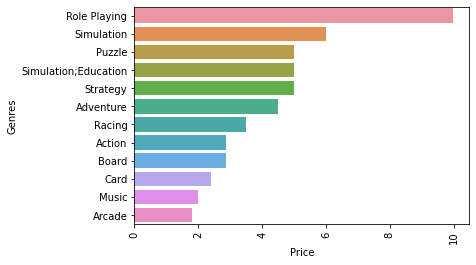

<Figure size 3600x2880 with 0 Axes>

In [ ]:
ax = sns.barplot(x = 'Price', y='Genres', data=dfgame_paid1.sort_values(by='Price', ascending=False))
plt.xticks(rotation=90)
plt.figure(figsize=(50,40))
plt.tight_layout
plt.show()

Mengiris harga terendah dari masing-masing genre

In [ ]:
dfgame_paid_min = dfgame_paid_cl.groupby(['Genres'])['Price'].min().sort_values(ascending=False).to_frame().reset_index()
dfgame_paid_min = dfgame_paid_min.rename(columns={'Price' : 'Lowest Price'})
dfgame_paid_min.head(3)

,Genres,Lowest Price
0,Role Playing,9.99
1,Simulation,5.99
2,Puzzle,4.99


Mengiris harga tertinggi dari masing-masing genre

In [ ]:
dfgame_paid_max = dfgame_paid_cl.groupby(['Genres'])['Price'].max().sort_values(ascending=False).to_frame().reset_index()
dfgame_paid_max = dfgame_paid_max.rename(columns={'Price' : 'Highest Price'})
dfgame_paid_max.head(3)

,Genres,Highest Price
0,Role Playing,9.99
1,Board,7.99
2,Action,6.99


Menggabungkan kedua tabel dan membuat perhitungan range rekomendasi harga.

In [ ]:
combined = pd.merge(dfgame_paid_min, dfgame_paid_max, how='inner', on='Genres')
combined['Rekomendasi harga terendah'] = combined['Lowest Price'] - (combined['Lowest Price'] * 0.05)
combined['Rekomendasi harga tertinggi'] = combined['Highest Price'] + (combined['Highest Price'] * 0.05)
combined

,Genres,Lowest Price,Highest Price,Rekomendasi harga terendah,Rekomendasi harga tertinggi
0,Role Playing,9.99,9.99,9.4905,10.4895
1,Simulation,5.99,5.99,5.6905,6.2895
2,Puzzle,4.99,4.99,4.7405,5.2395
3,Simulation;Education,4.99,4.99,4.7405,5.2395
4,Strategy,4.99,4.99,4.7405,5.2395
5,Racing,2.99,3.99,2.8405,4.1895
6,Music,1.99,1.99,1.8905,2.0895
7,Action,0.99,6.99,0.9405,7.3395
8,Adventure,0.99,6.99,0.9405,7.3395
9,Arcade,0.99,4.99,0.9405,5.2395


Tabel di atas adalah tabel rekomendasi harga per genre yang dapat dimanfaatkan untuk menetapkan harga saat memasarkan game baru nantinya.

# Kesimpulan

Sebagai kesimpulan dari pengolahan data ini, sifat game yang perlu dipertimbangkan yaitu:
- Genre yang perlu dipertimbangkan: arcade, action, casual, racing, puzzle.
- Free to play.
- Dengan rata-rata size 36 Mb.

Meskipun begitu, pemilihan model bisnis 'free-to-play' memiliki kecenderungan menurunkan kualitas gameplay. Untuk mencegah hal ini, biasanya para developer memilih model bisnis 'pay-to-play'. Tapi, hal ini juga berdampak kepada jumlah download aplikasi karena sifatnya yang berbayar. Orang-orang akan memilih game gratis. Untuk itu, jika memilih model bisnis pay-to play ini, hal yang perlu dipertimbangkan antara lain:
- Bergenre Action, adventure, Board, Card.
- size 36 Mb.
- Jika memilih genre Action, harga ditetapkan dengan rentang: $0.99 - $6.50.
- Jika memilih genre Adventure, harga ditetapkan dengan rentang: $0.99 - $3.88.
- Untuk range harga genre lain, tabel rekomendasi harga di atas dapat dijadikan acuan.

Link Dashboard: https://public.tableau.com/views/tableau_milestone/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link